# 1.PREPARACION DEL ENTORNO DE TRABAJO.

### 1.1 Instalación de bibliotecas.

In [39]:
#pip install tensorflow matplotlib numpy scikit-learn


# 2. CARGA Y PREPROCESAMIENTO DEL DATASET.

cargar el data drt MNIST  y preprocesarlo para sre utilizado en el modelo.

### 2.1 Cargar el Dataset MNIST.

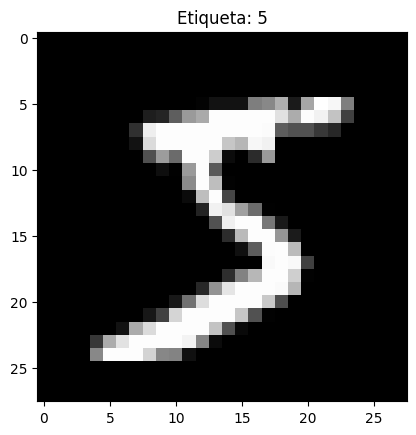

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar las imágenes al rango [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Redimensionar para agregar la dimensión de canal (28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


# Ver una muestra de los datos
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"Etiqueta: {y_train[0]}")
plt.show()


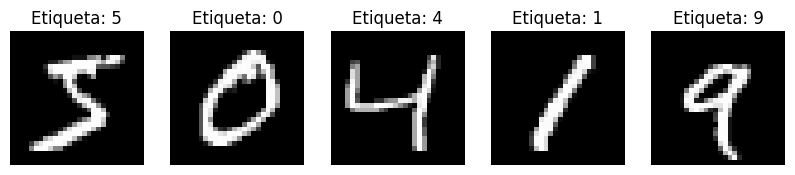

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Visualizar múltiples muestras de dígitos en diferentes formatos

# Mostrar las primeras 5 imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')  # Mostrar imagen
    plt.title(f"Etiqueta: {y_train[i]}")  # Mostrar etiqueta
    plt.axis('off')  # Desactivar ejes
plt.show()

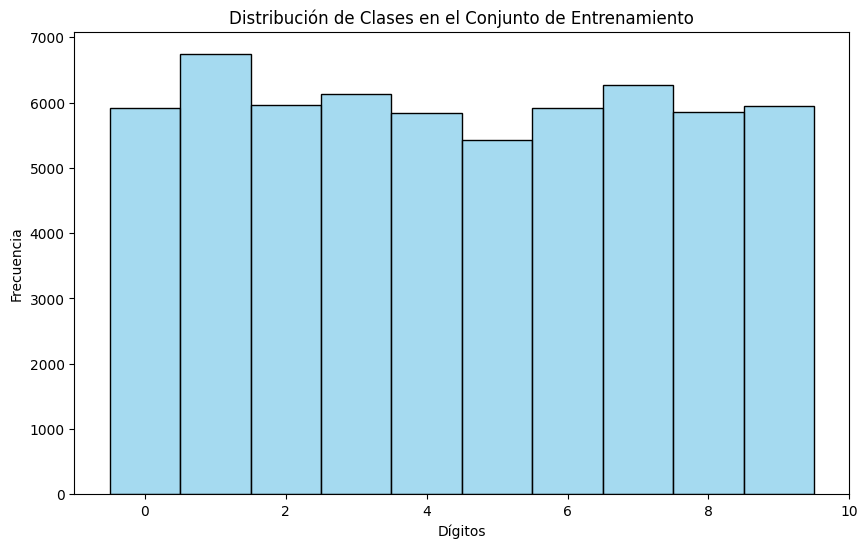

In [42]:
# 2. Agrupar imágenes por clase y analizar distribución

# Histogramas para ver cuántas imágenes hay de cada número
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=False, bins=10, color='skyblue', discrete=True)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Dígitos')
plt.ylabel('Frecuencia')
plt.show()


Frecuencia de cada clase (0-9):
Dígito 0: 5923 imágenes
Dígito 1: 6742 imágenes
Dígito 2: 5958 imágenes
Dígito 3: 6131 imágenes
Dígito 4: 5842 imágenes
Dígito 5: 5421 imágenes
Dígito 6: 5918 imágenes
Dígito 7: 6265 imágenes
Dígito 8: 5851 imágenes
Dígito 9: 5949 imágenes


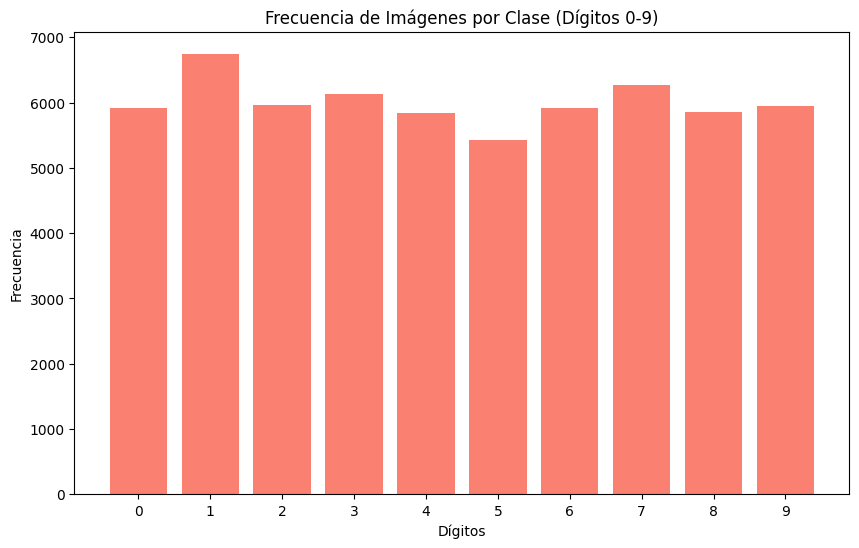

In [43]:
# 3. ¿Hay desbalance en las clases?
# Verificar si hay clases desbalanceadas:
class_counts = np.bincount(y_train)  # Cuenta de ocurrencias de cada clase
print("Frecuencia de cada clase (0-9):")
for i, count in enumerate(class_counts):
    print(f"Dígito {i}: {count} imágenes")

# Visualizar un gráfico de barras para el conteo de clases
plt.figure(figsize=(10, 6))
plt.bar(range(10), class_counts, color='salmon')
plt.title('Frecuencia de Imágenes por Clase (Dígitos 0-9)')
plt.xlabel('Dígitos')
plt.ylabel('Frecuencia')
plt.xticks(range(10))
plt.show()

In [44]:
# 4. ¿Hay clases desbalanceadas?
# Si observamos un desbalance significativo, se puede tomar acción:
# Por ejemplo, usando técnicas como oversampling o data augmentation.
max_class_count = max(class_counts)
for i, count in enumerate(class_counts):
    if count < max_class_count * 0.8:  # Definir un umbral (80% del máximo)
        print(f"Clase {i} tiene menos imágenes que el 80% de la clase más grande.")


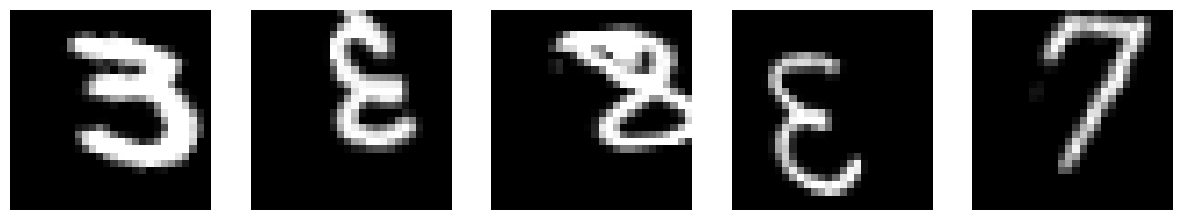

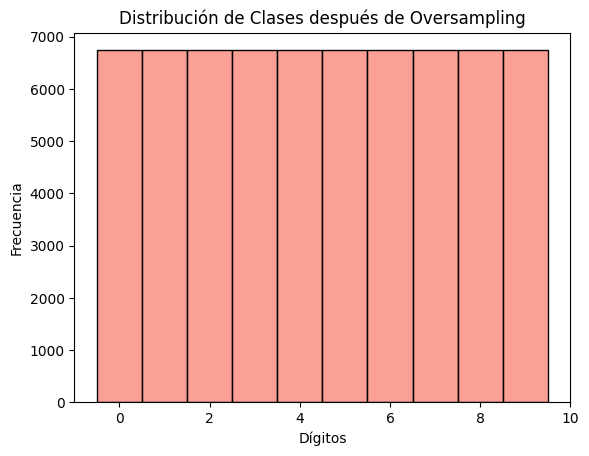

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler # Make sure to have imbalanced-learn installed


# Crear un generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=30,          # Rotar las imágenes en un rango de 30 grados
    width_shift_range=0.2,      # Desplazar las imágenes horizontalmente
    height_shift_range=0.2,     # Desplazar las imágenes verticalmente
    shear_range=0.2,            # Aplicar un corte aleatorio a las imágenes
    zoom_range=0.2,             # Hacer zoom aleatorio en las imágenes
    horizontal_flip=True,       # Voltear las imágenes horizontalmente
    fill_mode='nearest',        # Método de relleno para los píxeles faltantes
    brightness_range=[0.2, 1.5] # Cambiar el brillo de las imágenes
)

# Ajustar las imágenes de entrenamiento al generador
x_train_augmented =  np.copy(x_train)
x_train_augmented =  x_train_augmented.reshape(x_train_augmented.shape[0], 28, 28, 1)
#np.copy(x_train)

# Ajustar el generador a las imágenes
datagen.fit(x_train_augmented)

# Aplicar aumento de datos a las imágenes
augmented_images = []
image_iterator = datagen.flow(x_train_augmented, batch_size=1)
for _ in range(5):  # Crear 5 imágenes aumentadas
    augmented_images.append(next(image_iterator)[0])

# Mostrar las imágenes aumentadas
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    ax[i].imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    ax[i].axis('off')
plt.show()

# Después de hacer el aumento de datos, puedes realizar el oversampling
x_train_flat = x_train_augmented.reshape(x_train_augmented.shape[0], -1)  # Volver a 2D

# Realizar oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train_flat, y_train)

# Mostrar la nueva distribución
sns.histplot(y_resampled, kde=False, bins=10, color='salmon', discrete=True)
plt.title('Distribución de Clases después de Oversampling')
plt.xlabel('Dígitos')
plt.ylabel('Frecuencia')
plt.show()


### 2.2 Division de Datos.
 dividir correctamente los datos en entrenamiento, validación y prueba


In [46]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento en un subconjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train)


### 2.3 Aumento de datos (Data Augmentation)

técnicas de aumento de datos, que aplican transformaciones como rotaciones, traslaciones y cambios de brillo.

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2]
)

datagen.fit(X_train)


# 3. CONSTRUCCION DEL MODELO DE RED NEURONAL CONVOLUCIONAL (CNN)

Se define la arquitectura de la red neuronal convolucional.

### 3.1 definir el modelo.

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construir el modelo CNN
model = Sequential()

# Capa convolucional con 32 filtros
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional con 64 filtros
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar la salida para conectarla a la capa densa
model.add(Flatten())

# Capa densa con 128 unidades
model.add(Dense(128, activation='relu'))

# Capa de salida con 10 neuronas (una para cada dígito) y activación softmax
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3.2 Compilar el modelo.

Configurar el optimizador, la función de pérdida y las métricas para el modelo

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 4. ENTRENAMIENTO DEL MODELO

### 4.1 Entrenar el modelo.

In [50]:
# Entrenar el modelo usando el generador de aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(X_val, y_val))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


797/797 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.1130 - loss: 2.2942 - val_accuracy: 0.7213 - val_loss: 0.9126
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.1220 - loss: 2.2740 - val_accuracy: 0.8164 - val_loss: 0.6294
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.1251 - loss: 2.2700 - val_accuracy: 0.8961 - val_loss: 0.4514
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.1263 - loss: 2.2715 - val_accuracy: 0.8980 - val_loss: 0.3464
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.1272 - loss: 2.2709 - val_accuracy: 0.9053 - val_loss: 0.3011
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.1247 - loss: 2.2694 - val_accuracy: 0.8882 - val_loss: 0.3642
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.1245 - loss: 2.2649 - val_accuracy: 0.9298 - val_loss: 0.3151
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.1256 - loss: 2.2659 - val_accurac

# 5. EVALUACION DEL MODELO.

 Se evalúa su rendimiento en el conjunto de prueba


In [51]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Precisión en el conjunto de prueba: {test_acc}")


313/313 - 1s - 3ms/step - accuracy: 0.9005 - loss: 0.3343
Precisión en el conjunto de prueba: 0.9004999995231628


# 6. Visualizacion de resultados.

Se visualiza las curvas de entrenamiento y validación para ver cómo está funcionando el modelo.

### 6.1 Curvas de precision y perdida.





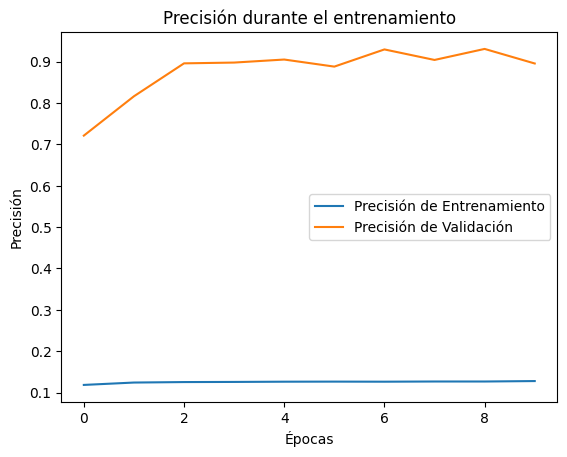

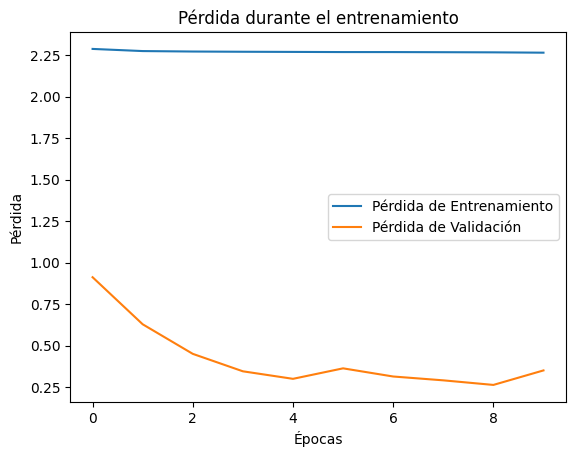

In [52]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### 6.2 Matriz de confusion.

Para visualizar en qué clases está fallando más el modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


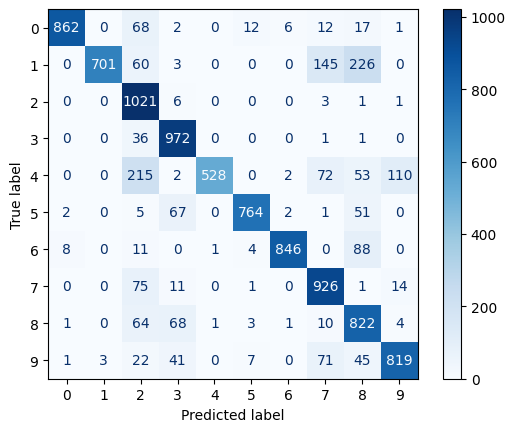

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

# Matriz
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Blues", values_format='d')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


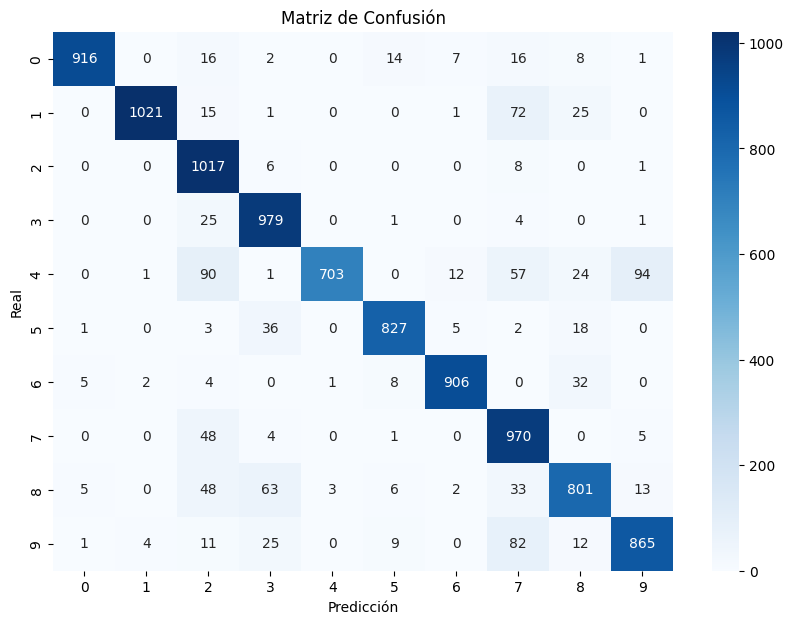

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# 7.DESPLIEGUE DEL MODELO.

### 7.1 Guardar el modelo.

In [57]:
model.save('modelo_postal_3.h5')  # Guarda el modelo en un archivo .h5
